In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load all results
with open('../results/baseline_results.pkl', 'rb') as f:
    baseline_results = pickle.load(f)

with open('../results/bilstm_results.pkl', 'rb') as f:
    bilstm_results = pickle.load(f)

with open('../results/transformer_results.pkl', 'rb') as f:
    transformer_results = pickle.load(f)

print("All results loaded!")

All results loaded!


In [ ]:
# comprehensive results DataFrame
results_data = []

for pct in [0.25, 0.50, 0.75, 1.0]:
    results_data.append({
        'History (%)': int(pct * 100),
        'Avg Posts': baseline_results['early_detection'][pct]['avg_posts_used'],
        'Baseline Acc': baseline_results['early_detection'][pct]['accuracy'],
        'Baseline F1': baseline_results['early_detection'][pct]['f1_macro'],
        'BiLSTM Acc': bilstm_results['early_detection'][pct]['accuracy'],
        'BiLSTM F1': bilstm_results['early_detection'][pct]['f1_macro'],
        'Transformer Acc': transformer_results['early_detection'][pct]['accuracy'],
        'Transformer F1': transformer_results['early_detection'][pct]['f1_macro'],
    })

results_df = pd.DataFrame(results_data)

print("=" * 80)
print("FINAL RESULTS: Early Mental Health Risk Detection")
print("=" * 80)
print()
print(results_df.to_string(index=False))
print()

# Save to CSV
results_df.to_csv('../results/final_results.csv', index=False)
print("✓ Saved to results/final_results.csv")

FINAL RESULTS: Early Mental Health Risk Detection

 History (%)  Avg Posts  Baseline Acc  Baseline F1  BiLSTM Acc  BiLSTM F1  Transformer Acc  Transformer F1
          25   1.976562      0.841146     0.814708    0.812500   0.770062         0.747396        0.725735
          50   4.398438      0.924479     0.906976    0.911458   0.888374         0.869792        0.850198
          75   6.546875      0.916667     0.897003    0.937500   0.922539         0.927083        0.913133
         100   9.401042      0.929688     0.910357    0.937500   0.917941         0.911458        0.893187

✓ Saved to results/final_results.csv


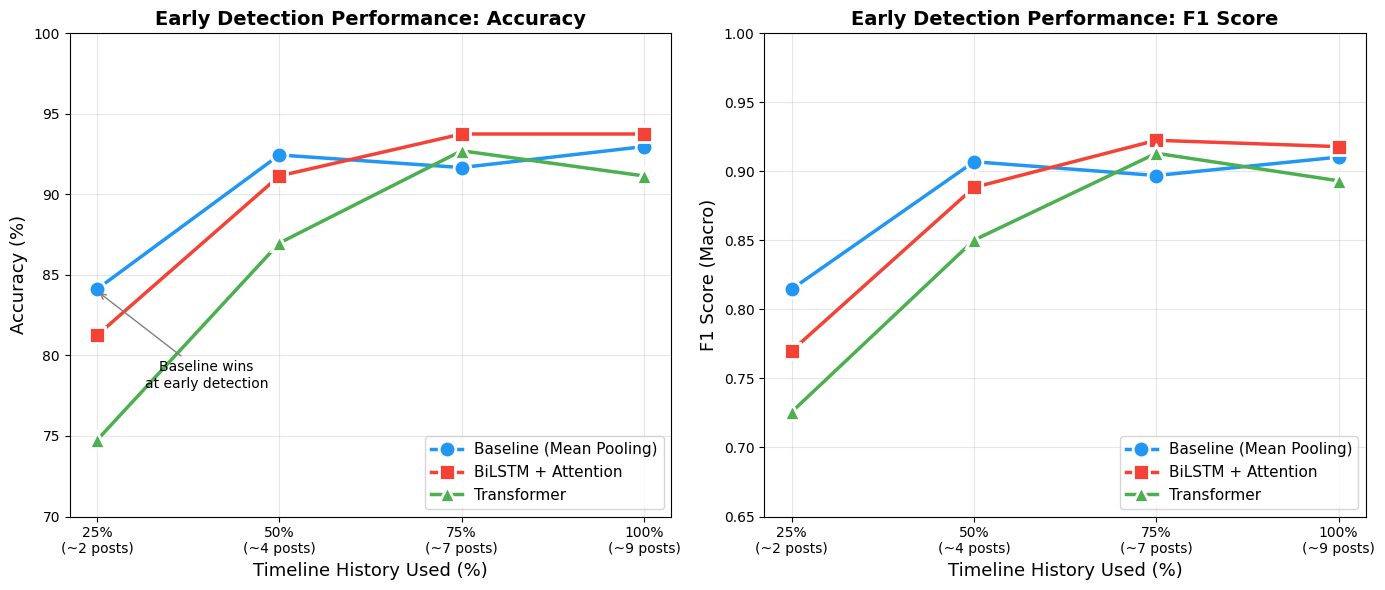

✓ Saved publication-quality figure to results/final_comparison_figure.png


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x = [25, 50, 75, 100]
baseline_accs = [baseline_results['early_detection'][p]['accuracy'] * 100 for p in [0.25, 0.5, 0.75, 1.0]]
bilstm_accs = [bilstm_results['early_detection'][p]['accuracy'] * 100 for p in [0.25, 0.5, 0.75, 1.0]]
transformer_accs = [transformer_results['early_detection'][p]['accuracy'] * 100 for p in [0.25, 0.5, 0.75, 1.0]]

# Style settings
colors = {'Baseline': '#2196F3', 'BiLSTM': '#F44336', 'Transformer': '#4CAF50'}

# Accuracy plot
axes[0].plot(x, baseline_accs, 'o-', color=colors['Baseline'], label='Baseline (Mean Pooling)', 
             linewidth=2.5, markersize=12, markeredgecolor='white', markeredgewidth=2)
axes[0].plot(x, bilstm_accs, 's-', color=colors['BiLSTM'], label='BiLSTM + Attention', 
             linewidth=2.5, markersize=12, markeredgecolor='white', markeredgewidth=2)
axes[0].plot(x, transformer_accs, '^-', color=colors['Transformer'], label='Transformer', 
             linewidth=2.5, markersize=12, markeredgecolor='white', markeredgewidth=2)

axes[0].set_xlabel('Timeline History Used (%)', fontsize=13)
axes[0].set_ylabel('Accuracy (%)', fontsize=13)
axes[0].set_title('Early Detection Performance: Accuracy', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11, loc='lower right')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['25%\n(~2 posts)', '50%\n(~4 posts)', '75%\n(~7 posts)', '100%\n(~9 posts)'])
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([70, 100])

# annotation for key finding
axes[0].annotate('Baseline wins\nat early detection', xy=(25, 84), xytext=(40, 78),
                fontsize=10, ha='center',
                arrowprops=dict(arrowstyle='->', color='gray'))

# F1 plot
baseline_f1s = [baseline_results['early_detection'][p]['f1_macro'] for p in [0.25, 0.5, 0.75, 1.0]]
bilstm_f1s = [bilstm_results['early_detection'][p]['f1_macro'] for p in [0.25, 0.5, 0.75, 1.0]]
transformer_f1s = [transformer_results['early_detection'][p]['f1_macro'] for p in [0.25, 0.5, 0.75, 1.0]]

axes[1].plot(x, baseline_f1s, 'o-', color=colors['Baseline'], label='Baseline (Mean Pooling)', 
             linewidth=2.5, markersize=12, markeredgecolor='white', markeredgewidth=2)
axes[1].plot(x, bilstm_f1s, 's-', color=colors['BiLSTM'], label='BiLSTM + Attention', 
             linewidth=2.5, markersize=12, markeredgecolor='white', markeredgewidth=2)
axes[1].plot(x, transformer_f1s, '^-', color=colors['Transformer'], label='Transformer', 
             linewidth=2.5, markersize=12, markeredgecolor='white', markeredgewidth=2)

axes[1].set_xlabel('Timeline History Used (%)', fontsize=13)
axes[1].set_ylabel('F1 Score (Macro)', fontsize=13)
axes[1].set_title('Early Detection Performance: F1 Score', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11, loc='lower right')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['25%\n(~2 posts)', '50%\n(~4 posts)', '75%\n(~7 posts)', '100%\n(~9 posts)'])
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0.65, 1.0])

plt.tight_layout()
plt.savefig('../results/final_comparison_figure.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved publication-quality figure to results/final_comparison_figure.png")

In [5]:
print("""
================================================================================
                        PROJECT SUMMARY: KEY FINDINGS
================================================================================

RESEARCH QUESTION:
Can sequential deep learning models (BiLSTM, Transformer) detect mental health 
risk earlier than simple aggregation methods?

DATASET:
- 2,558 Reddit users with 5+ posts
- 5 mental health categories: ADHD, OCD, Aspergers, Depression, PTSD
- Average timeline length: 9.4 posts per user

MODELS COMPARED:
1. Baseline: Mean pooling + Logistic Regression
2. BiLSTM + Attention: Sequential model with attention mechanism
3. Transformer: Self-attention based encoder

KEY FINDINGS:

1. EARLY DETECTION (25% history, ~2 posts):
   - Baseline: 84.1% accuracy (BEST)
   - BiLSTM: 81.2% accuracy
   - Transformer: 74.7% accuracy
   → Simple aggregation is MORE ROBUST with limited data

2. FULL HISTORY (100%, ~9 posts):
   - BiLSTM: 93.8% accuracy (BEST)
   - Baseline: 93.0% accuracy
   - Transformer: 91.1% accuracy
   → Sequential models help with sufficient data

3. PRACTICAL IMPLICATIONS:
   - For early intervention (few posts): Use simple models
   - For active users (many posts): Sequential models add value
   - Transformer needs more data than available in this dataset

CONCLUSION:
Complex models aren't always better. The simple baseline outperformed 
sophisticated deep learning models for early detection, demonstrating the 
importance of proper baselines in ML research.

================================================================================
""")


                        PROJECT SUMMARY: KEY FINDINGS

RESEARCH QUESTION:
Can sequential deep learning models (BiLSTM, Transformer) detect mental health 
risk earlier than simple aggregation methods?

DATASET:
- 2,558 Reddit users with 5+ posts
- 5 mental health categories: ADHD, OCD, Aspergers, Depression, PTSD
- Average timeline length: 9.4 posts per user

MODELS COMPARED:
1. Baseline: Mean pooling + Logistic Regression
2. BiLSTM + Attention: Sequential model with attention mechanism
3. Transformer: Self-attention based encoder

KEY FINDINGS:

1. EARLY DETECTION (25% history, ~2 posts):
   - Baseline: 84.1% accuracy (BEST)
   - BiLSTM: 81.2% accuracy
   - Transformer: 74.7% accuracy
   → Simple aggregation is MORE ROBUST with limited data

2. FULL HISTORY (100%, ~9 posts):
   - BiLSTM: 93.8% accuracy (BEST)
   - Baseline: 93.0% accuracy
   - Transformer: 91.1% accuracy
   → Sequential models help with sufficient data

3. PRACTICAL IMPLICATIONS:
   - For early intervention (few posts